I hope to fill up this notebook with a large set of density profiles which I will use to  determine better depths to choose from. 

In [1]:
import sys
sys.path.append('/ocean/kflanaga/MEOPAR/analysis-keegan/notebooks/Tools')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean
import json
import f90nml
import Keegan_eval_tools as ket
from collections import OrderedDict
from matplotlib.colors import LogNorm

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline

In [18]:
years=[2008,2009]
year=2009
modelversion='nowcast-green.201905'
PATH= '/results2/SalishSea/nowcast-green.201905/'
datadir='/ocean/eolson/MEOPAR/obs/WADE/ptools_data/ecology'

In [19]:
display(Markdown('''## All years summary'''))

## All years summary

In [20]:
display(Markdown('''### Model output: '''+ PATH))

### Model output: /results2/SalishSea/nowcast-green.201905/

## Yearly model-data comparisons of chlorophyll, temperature and salinity between 201905 runs and CTD observations

In [21]:
##### Loading in pickle file data
saveloc='/ocean/kflanaga/MEOPAR/savedData'
with open(os.path.join(saveloc,f'data_CTD_{modelversion}_{year}.pkl'),'rb') as hh:
    data_all=pickle.load(hh)

In [22]:
#Adding extra columns to assist in analysis.

Chl_to_N=1.8
data_all['log_Chl']=ket.logt(data_all['Chl'])
data_all['log_mod_diatoms']=ket.logt(data_all['mod_diatoms']*Chl_to_N)
data_all['log_mod_ciliates']=ket.logt(data_all['mod_ciliates']*Chl_to_N)
data_all['log_mod_flagellates']=ket.logt(data_all['mod_flagellates']*Chl_to_N)
data_all['mod_Chl']=((data_all['mod_diatoms']*Chl_to_N)+(data_all['mod_ciliates']*Chl_to_N)+(data_all['mod_flagellates']*Chl_to_N))
data_all['log_mod_Chl']=ket.logt((data_all['mod_diatoms']*Chl_to_N)+(data_all['mod_ciliates']*Chl_to_N)+(data_all['mod_flagellates']*Chl_to_N))

In [23]:
# Creating seperate dataframes for each season (includes only dataabove 15 metre depth.)
iz=(data_all.Z<15)
DJF_CTD=data_all.loc[iz&(data_all.dtUTC>=dt.datetime(years[0],12,1))&(data_all.dtUTC<=dt.datetime(years[1],3,1)),:]
MAM_CTD=data_all.loc[iz&(data_all.dtUTC<=dt.datetime(years[1],6,1))&(data_all.dtUTC>dt.datetime(years[1],3,1)),:]
JJA_CTD=data_all.loc[iz&(data_all.dtUTC<=dt.datetime(years[1],9,1))&(data_all.dtUTC>dt.datetime(years[1],6,1)),:]
SON_CTD=data_all.loc[iz&(data_all.dtUTC>dt.datetime(years[1],9,1))&(data_all.dtUTC<=dt.datetime(years[1],11,30)),:]

In [24]:
data_CTD=data_all.loc[(data_all.dtUTC>=dt.datetime(years[0],12,1))&(data_all.dtUTC<=dt.datetime(years[1],11,30)),:]

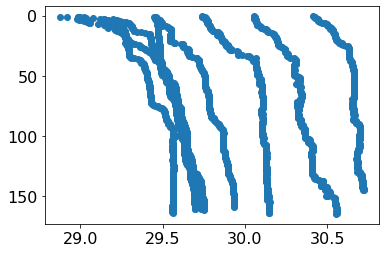

In [38]:
fig,ax = plt.subplots(1,1)
ax.scatter(data_CTD[data_CTD.Station=='GOR001'].SA,data_CTD[data_CTD.Station=='GOR001'].Z)
ax.invert_yaxis()